In [1]:
# Importing the libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")
# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)
# Import psql to run queries 

import pandasql as psql

In [2]:
# load the Data Scientist Salary modelling

Salary = pd.read_csv(r"C:\Users\Dlc\Downloads\Final.csv", encoding='cp1252')
Salary_BK = Salary.copy()

# Display first five Salary data

Salary.head()

,Rating,Company,Average,Lowest,Highest,yr/mo/hr
0,3.6,Tech Mahindra,937156,"4,18,054","23,35,432",/yr
1,3.7,Optum,1508702,"8,87,265","24,00,000",/yr
2,4.1,Fresher,540557,"1,89,354","14,72,751",/yr
3,3.7,HCL Technologies,887986,"4,16,339","19,26,785",/yr
4,3.9,Genpact,972181,"2,49,195","23,82,853",/yr


In [3]:
#display information of Salary Data
Salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4100 entries, 0 to 4099
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rating    3854 non-null   float64
 1   Company   4100 non-null   object 
 2   Average   4100 non-null   object 
 3   Lowest    4100 non-null   object 
 4   Highest   4100 non-null   object 
 5   yr/mo/hr  4100 non-null   object 
dtypes: float64(1), object(5)
memory usage: 192.3+ KB


In [4]:
#Display is there any null values in Salary Data

Salary.isnull().sum()

Rating      246
Company       0
Average       0
Lowest        0
Highest       0
yr/mo/hr      0
dtype: int64

In [5]:
#using knn imputer to address the Rating missing values
#KNNImputer (misssing_values=np.nan,n_neighbors=5,weights='uniform',metric='nan_euclidean',copy=True,add_indicator=False)
from sklearn.impute import KNNImputer
#create an object
imputer_knn=KNNImputer(missing_values=np.nan)
#Fill the missing values for 'Rating'
Salary['Rating']=imputer_knn.fit_transform(Salary[['Rating']])
Salary['Rating']=Salary['Rating'].astype(int)
Salary

,Rating,Company,Average,Lowest,Highest,yr/mo/hr
0,3,Tech Mahindra,937156,"4,18,054","23,35,432",/yr
1,3,Optum,1508702,"8,87,265","24,00,000",/yr
2,4,Fresher,540557,"1,89,354","14,72,751",/yr
3,3,HCL Technologies,887986,"4,16,339","19,26,785",/yr
4,3,Genpact,972181,"2,49,195","23,82,853",/yr
...,...,...,...,...,...,...
4095,4,Google,"58,77,867","70,05,287","76,89,380",/mo
4096,3,Bookmyshow,"2,44,504","2,92,593","3,18,666",/mo
4097,3,Philips,"1,63,488","1,96,938","2,11,783",/mo
4098,3,CL Educate,"49,324","59,388","63,923",/mo


In [6]:
#Display is there any null values in Salary Data

Salary.isnull().sum()

Rating      0
Company     0
Average     0
Lowest      0
Highest     0
yr/mo/hr    0
dtype: int64

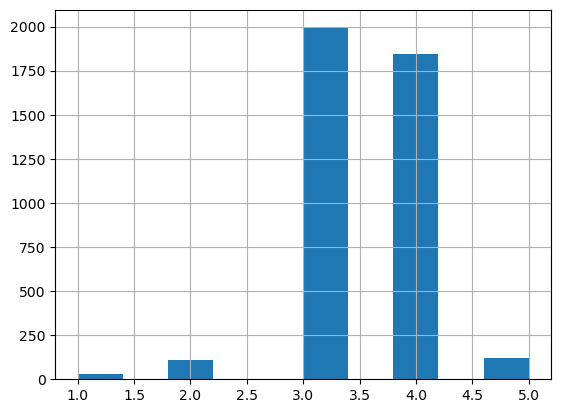

In [7]:
#As we know the missing data, Manage with Null Data include; Rating and Data Analysis

# Rating means potential of Hydrogen

Salary['Rating'].hist()
Salary['Rating']= Salary['Rating'].fillna(Salary['Rating'].mean())

In [8]:
#Describing the Salary Data

Salary.describe()

,Rating
count,4100.000000
mean,3.468049
std,0.637300
min,1.000000
25%,3.000000
50%,3.000000
75%,4.000000
max,5.000000


In [9]:
#lets convert it into int type
df = pd.DataFrame(Salary)
# Remove commas and convert  columns  to numeric
df['Lowest'] = df['Lowest'].str.replace(',','').astype(float)
df['Highest'] = df['Highest'].str.replace(',','').astype(float)
df['Average'] = df['Average'].str.replace(',','').astype(int)

In [10]:
#Describe Transpose Salary Data

Salary.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rating,4100.0,3.468049e+00,6.373000e-01,1.0,3.00,3.0,4.00,5.0
Average,4100.0,7.608049e+05,1.552387e+06,14.0,81438.00,557364.5,1025321.50,84045868.0
Lowest,4100.0,7.675085e+05,1.789438e+06,1.0,85091.00,538066.0,1015827.75,100956920.0
Highest,4100.0,1.140011e+06,2.241229e+06,19.0,109159.25,759266.0,1565450.25,109157751.0


In [11]:
#find Duplicates Values in Salary Data

Salary_dup=Salary[Salary.duplicated(keep='last')]
Salary_dup

,Rating,Company,Average,Lowest,Highest,yr/mo/hr
337,3,Tata Consultancy Services,931124,512507.0,1815302.0,/yr


In [12]:
#CONVERTING HOURLY SALARIES INTO MONTHWISE
#The known average work hours in India are 40 hours per week & there are on avg 4 working weeks per month
#Average work hours for a month = 40 * 4 

Salary['Average'].loc[Salary['yr/mo/hr'] == '/hr'] = Salary['Average'].loc[Salary['yr/mo/hr'] == '/hr'] * 40 * 4
Salary['Lowest'].loc[Salary['yr/mo/hr'] == '/hr'] = Salary['Lowest'].loc[Salary['yr/mo/hr'] == '/hr'] * 40 * 4 
Salary['Highest'].loc[Salary['yr/mo/hr'] == '/hr'] = Salary['Highest'].loc[Salary['yr/mo/hr'] == '/hr'] * 40 * 4
Salary['yr/mo/hr'].loc[Salary['yr/mo/hr'] == '/hr'] = '/mo'

#CONVERTING MONTHLY SALARIES INTO YEARWISE
Salary['Average'].loc[Salary['yr/mo/hr'] == '/mo'] = Salary['Average'].loc[Salary['yr/mo/hr'] == '/mo'] * 12
Salary['Lowest'].loc[Salary['yr/mo/hr'] == '/mo'] = Salary['Lowest'].loc[Salary['yr/mo/hr'] == '/mo'] * 12
Salary['Highest'].loc[Salary['yr/mo/hr'] == '/mo'] = Salary['Highest'].loc[Salary['yr/mo/hr'] == '/mo'] * 12
Salary['yr/mo/hr'].loc[Salary['yr/mo/hr'] == '/mo'] = '/yr'

Salary.drop('yr/mo/hr', axis=1, inplace=True)

In [13]:
# Display first five Salary data

Salary.head()

,Rating,Company,Average,Lowest,Highest
0,3,Tech Mahindra,937156,418054.0,2335432.0
1,3,Optum,1508702,887265.0,2400000.0
2,4,Fresher,540557,189354.0,1472751.0
3,3,HCL Technologies,887986,416339.0,1926785.0
4,3,Genpact,972181,249195.0,2382853.0


In [14]:
#Display Data in Company Column Count

Salary['Company'].value_counts()

Tata Consultancy Services    19
Accenture                    15
IBM                          14
Fresher                      12
dunnhumby                    11
                             ..
Ankit                         1
PlotMyData                    1
YOGESH SHARMA                 1
Raj Mahawala                  1
CL Educate                    1
Name: Company, Length: 3230, dtype: int64

In [15]:
#label encoder
from sklearn.preprocessing import LabelEncoder

df1 = pd.DataFrame(Salary)
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Choose the column you want to encode
column_to_encode = 'Company'

# Check if the column is of object type (string) before encoding
if df1[column_to_encode].dtype == 'object':
    df1[column_to_encode] = label_encoder.fit_transform(df1[column_to_encode])

In [16]:
# Display first five Salary data

Salary.head()

,Rating,Company,Average,Lowest,Highest
0,3,2713,937156,418054.0,2335432.0
1,3,2021,1508702,887265.0,2400000.0
2,4,1037,540557,189354.0,1472751.0
3,3,1185,887986,416339.0,1926785.0
4,3,1100,972181,249195.0,2382853.0


In [17]:
#Display Data in Company Column Count

Salary['Company'].value_counts()

Tata Consultancy Services    19
Accenture                    15
IBM                          14
Fresher                      12
dunnhumby                    11
                             ..
Ankit                         1
PlotMyData                    1
YOGESH SHARMA                 1
Raj Mahawala                  1
CL Educate                    1
Name: Company, Length: 3230, dtype: int64

In [18]:
#Display columns names in Salary Data

Salary.columns

Index(['Rating', 'Company', 'Average', 'Lowest', 'Highest'], dtype='object')

In [19]:
# identify the variables to normalize with minmax scalar

cols=['Company', 'Average', 'Lowest']

In [20]:
# identify the independent and target variables

IndepVar = []
for col in Salary.columns:
    if col != 'Highest':
        IndepVar.append(col)
TargetVar = 'Highest'

x = Salary[IndepVar]
y = Salary[TargetVar]

In [21]:
# split the data into train and test (random sampling)

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

#display shape for train test and data

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((2870, 4), (1230, 4), (2870,), (1230,))

In [22]:
#scaling the features by using minmaxscaler

from sklearn.preprocessing import MinMaxScaler

mmscaler =  MinMaxScaler(feature_range=(0,1))

x_train[cols] = mmscaler.fit_transform(x_train[cols])

# x_train = mmscalar.fit_transform(x_train)

x_train = pd.DataFrame(x_train)

x_test[cols] = mmscaler.fit_transform(x_test[cols])
x_test = pd.DataFrame(x_test)

In [23]:
#Explotary Data Analysis Pandas Profiling Report

from pandas_profiling import ProfileReport
profile=ProfileReport(Salary, explorative=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Compare with all Regression / Resgressors

In [24]:
# load the RGRResults modelling

RGRResults = pd.read_csv(r"C:\Users\Dlc\Downloads\RGRResults (1) (1).csv", header=0)

RGRResults_BK = RGRResults.copy()


# Display first five RGRResults data

RGRResults.head(5)

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score


In [25]:
# Build the Regression / Regressor models

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVR

# Create objects of Regression / Regressor models with default hyper-parameters

ModelMLR = LinearRegression()
ModelDCR = DecisionTreeRegressor()
ModelRFR = RandomForestRegressor()
ModelETR = ExtraTreesRegressor()
ModelKNN = KNeighborsRegressor(n_neighbors=5)
ModelBRR = BayesianRidge()
ModelSVR = SVR()

# Evalution matrix for all the algorithms

MM = [ModelMLR, ModelDCR, ModelRFR, ModelETR, ModelKNN, ModelBRR, ModelSVR] 
#MM = [ModelMLR, ModelDCR, ModelRFR, ModelETR]

for models in MM:
    
    # Fit the model with train data
    
    models.fit(x_train, y_train)
    
    # Predict the model with test data

    y_pred = models.predict(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # Evaluation metrics for Regression analysis

    from sklearn import metrics

    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))  
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))  
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))
    
    # Define the function to calculate the MAPE - Mean Absolute Percentage Error

    def MAPE (y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    # Evaluation of MAPE 

    result = MAPE(y_test, y_pred)
    print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')
    
    # Calculate Adjusted R squared values 

    r_squared = round(metrics.r2_score(y_test, y_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
    print('Adj R Square: ', adjusted_r_squared)
    print('------------------------------------------------------------------------------------------------------------')
    #-------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
               'Adj_R_Square' : adjusted_r_squared,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Absolute_Percentage_Error_MAPE' : result,
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
               'R2_score' : metrics.r2_score(y_test, y_pred)}
    RGRResults = RGRResults.append(new_row, ignore_index=True)
    #-------------------------------------------------------------------------------------------

Model Name:  LinearRegression()
Mean Absolute Error (MAE): 205953.449
Mean Squared Error (MSE): 386619248661.147
Root Mean Squared Error (RMSE): 621787.141
R2_score: 0.969154
Root Mean Squared Log Error (RMSLE): 13.34
Mean Absolute Percentage Error (MAPE): 44.38 %
Adj R Square:  0.969124
------------------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeRegressor()
Mean Absolute Error (MAE): 243028.241
Mean Squared Error (MSE): 613842961833.608
Root Mean Squared Error (RMSE): 783481.309
R2_score: 0.951025
Root Mean Squared Log Error (RMSLE): 13.572
Mean Absolute Percentage Error (MAPE): 17.48 %
Adj R Square:  0.950977
------------------------------------------------------------------------------------------------------------
Model Name:  RandomForestRegressor()
Mean Absolute Error (MAE): 240634.137
Mean Squared Error (MSE): 1339320591325.656
Root Mean Squared Error (RMSE): 1157290.193
R2_score: 0.893144
Root Mean Square

In [26]:
# Display first five RGRResults Data

RGRResults

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,LinearRegression(),2.059534e+05,0.969124,6.217871e+05,44.384029,3.866192e+11,13.340353,0.969154
1,DecisionTreeRegressor(),2.430282e+05,0.950977,7.834813e+05,17.484910,6.138430e+11,13.571502,0.951025
2,"(DecisionTreeRegressor(max_features=1.0, rando...",2.406341e+05,0.893040,1.157290e+06,16.713432,1.339321e+12,13.961592,0.893144
3,"(ExtraTreeRegressor(random_state=1325321419), ...",2.256789e+05,0.955178,7.491648e+05,16.636075,5.612479e+11,13.526714,0.955222
4,KNeighborsRegressor(),4.633671e+05,0.667866,2.039330e+06,2200.757986,4.158866e+12,14.528132,0.668190
5,BayesianRidge(),1.058278e+06,-0.001387,3.541050e+06,6958.822105,1.253903e+13,15.079934,-0.000410
6,SVR(),9.538999e+05,-0.018856,3.571802e+06,4120.791677,1.275777e+13,15.088581,-0.017862


In [27]:
# prediction the model with SVR

y_predF = ModelSVR.predict(x_test)

In [28]:
#Merge two DataFrames named Salary and Results based on their indices using the merge function
#Calculate the percentage error between the 'Highest_A' (actual values) and 'Highest_P' (predicted values) columns

Results=pd.DataFrame({'Highest_A':y_test,'Highest_P':y_predF})

ResultsFinal=Salary.merge(Results, left_index=True, right_index=True)

ResultsFinal['%Error']=round(((ResultsFinal['Highest_A']-ResultsFinal['Highest_P'])/ResultsFinal['Highest_A'])*100,3)

ResultsFinal.sample(5)

,Rating,Company,Average,Lowest,Highest,Highest_A,Highest_P,%Error
1114,3,2696,583646,701096.0,758020.0,758020.0,794047.852193,-4.753
3514,2,2090,893254,1072625.0,1160510.0,1160510.0,794045.115059,31.578
296,3,782,864883,596811.0,1565397.0,1565397.0,794050.840940,49.275
3105,3,119,1515972,1811058.0,1978871.0,1978871.0,794051.786972,59.873
3181,3,2476,609502,733123.0,790633.0,790633.0,794048.222907,-0.432


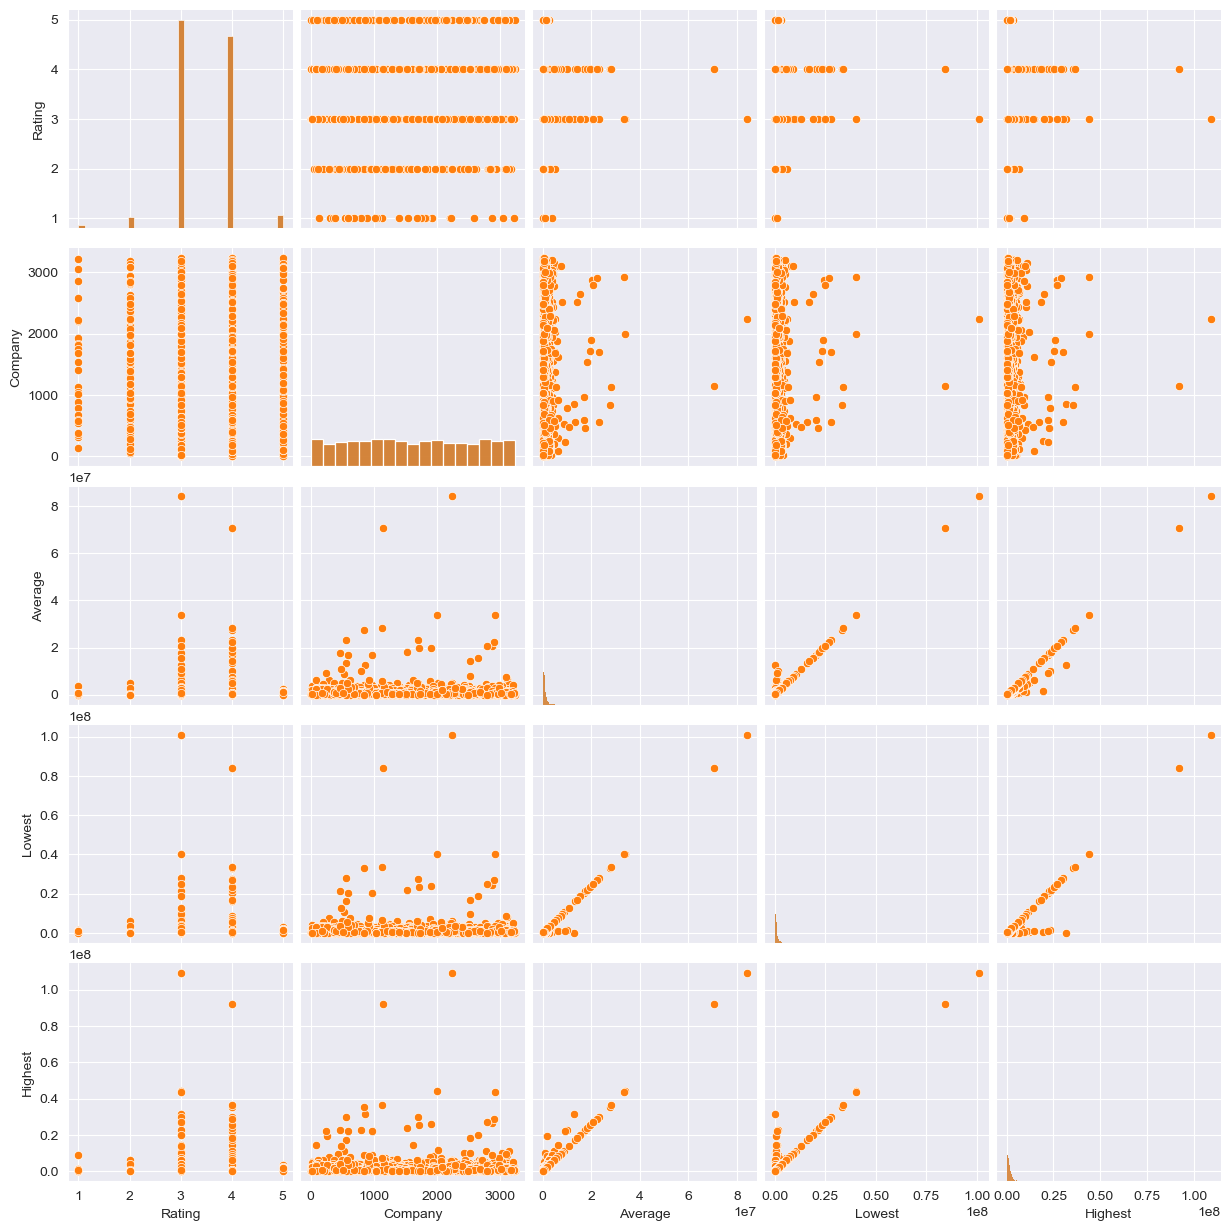

In [29]:
#Plots for Correlation

sns.set_style('darkgrid')

g=sns.pairplot(Salary, markers='o',palette='deep')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

In [30]:
#Analyze and visualize the distribution of job counts for each company in the 'Salary' DataFrame.

Salaryy=Salary['Company'].value_counts()
Salaryy =Salaryy.to_frame().reset_index()
Salaryy.columns=['company','Job_count']
Salaryy

,company,Job_count
0,2692,19
1,93,15
2,1294,14
3,1037,12
4,3143,11
...,...,...
3225,232,1
3226,2103,1
3227,3062,1
3228,2236,1


# Multiple Regression Algorithm

In [31]:
# Build the multi regression model

from sklearn.linear_model import LinearRegression  

# Create object for the model

ModelMLR = LinearRegression()

# Train the model with training data

ModelMLR.fit(x_train, y_train)

# Predict the model with test dataset

y_pred = ModelMLR.predict(x_test)

# Evaluation metrics for Regression analysis

from sklearn import metrics

print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))  
print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))  
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))
print('Mean Absolute Percentage Error (MAPE):', round(metrics.mean_absolute_percentage_error(y_test, y_pred)*100,3), '%')
# Define the function to calculate the MAPE - Mean Absolute Percentage Error

def MAPE (y_test, y_pred): 
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Evaluation of MAPE

result = MAPE(y_test, y_pred)
print('Mean Absolute Percentage Error (MAPE):', round(result, 3), '%')

# Calculate Adjusted R squared values 

r_squared = round(metrics.r2_score(y_test, y_pred),6)
adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
print('Adj R Square: ', adjusted_r_squared)

Mean Absolute Error (MAE): 205953.449
Mean Squared Error (MSE): 386619248661.147
Root Mean Squared Error (RMSE): 621787.141
R2_score: 0.969154
Root Mean Squared Log Error (RMSLE): 13.34
Mean Absolute Percentage Error (MAPE): 44.384 %
Mean Absolute Percentage Error (MAPE): 44.384 %
Adj R Square:  0.969124


In [32]:
#Merge two DataFrames named Salary and Results based on their indices using the merge function.
#Calculate the percentage error between the 'Highest_A' (actual values) and 'Highest_P' (predicted values) columns.

Results=pd.DataFrame({'Highest_A':y_test,'Highest_P':y_pred})

ResultsFinal=Salary.merge(Results, left_index=True, right_index=True)

ResultsFinal['%Error']=round(((ResultsFinal['Highest_A']-ResultsFinal['Highest_P'])/ResultsFinal['Highest_A'])*100,3)

ResultsFinal.sample(5)

,Rating,Company,Average,Lowest,Highest,Highest_A,Highest_P,%Error
195,3,1723,641130,768864.0,833960.0,833960.0,7.101590e+05,14.845
3642,2,295,950352,975628.0,1400253.0,1400253.0,1.194057e+06,14.726
1510,3,1276,727941,875612.0,944241.0,944241.0,8.071712e+05,14.516
2653,3,2819,132864,158941.0,173219.0,173219.0,1.425837e+05,17.686
2334,4,1785,32378,38993.0,41952.0,41952.0,4.498135e+04,-7.221


# Sql Queries

In [33]:
#Base Query to Display the Salary Data

Data_QP_New01 = psql.sqldf("select * \
                           from Salary \
                           ")

# Display first five Data_QP_New01 Data
Data_QP_New01.head()

,Rating,Company,Average,Lowest,Highest
0,3,2713,937156,418054.0,2335432.0
1,3,2021,1508702,887265.0,2400000.0
2,4,1037,540557,189354.0,1472751.0
3,3,1185,887986,416339.0,1926785.0
4,3,1100,972181,249195.0,2382853.0


In [34]:
#Display Rating column equalsto 4

Data_QP_New02 = psql.sqldf("select * \
                           from Salary \
                           where Rating = 4 \
                           ")
# Display first five Data_QP_New02 Data
Data_QP_New02.head()

,Rating,Company,Average,Lowest,Highest
0,4,1037,540557,189354.0,1472751.0
1,4,894,1452596,915998.0,2247916.0
2,4,1011,2663641,250000.0,4523450.0
3,4,2022,1408050,368188.0,2150000.0
4,4,1198,1645967,746186.0,2967786.0


In [35]:
#Shape of the Data_QP_New01 Data

Data_QP_New01.shape

(4100, 5)

In [36]:
#Shape of the Data_QP_New02 Data

Data_QP_New02.shape

(1842, 5)

In [37]:
#Display Company column equalsto 87

Data_QP_New03 = psql.sqldf("select * \
                           from Salary \
                           where Company = 87 \
                           ")
# Display first five Data_QP_New03 Data
Data_QP_New03.head()

,Rating,Company,Average,Lowest,Highest
0,3,87,544382,653662.0,707293.0
1,3,87,174012,174864.0,260172.0


In [38]:
#Shape of the Data_QP_New03 Data

Data_QP_New03.shape

(2, 5)

In [39]:
#Display Company column equalsto IBM in Salary_BK data

Data_QP_New04 = psql.sqldf("select * \
                           from Salary_BK \
                           where Company = 'IBM' \
                           ")
# Display first five Data_QP_New04 Data
Data_QP_New04.head()

,Rating,Company,Average,Lowest,Highest,yr/mo/hr
0,4.1,IBM,42739,"5,388","1,40,523",/mo
1,4.0,IBM,66358,"80,004","85,892",/yr
2,4.0,IBM,997759,"11,93,647","13,00,750",/yr
3,4.1,IBM,440751,"4,10,548","6,91,330",/yr
4,4.1,IBM,37590,"28,579","65,395",/yr


In [40]:
#Shape of the Data_QP_New04 Data

Data_QP_New04.shape

(14, 6)

In [41]:
#Display Company column greater than or equalto 100000

Data_QP_New05 = psql.sqldf("select * \
                           from Salary \
                           where Average >=100000 \
                           ")
# Display first five Data_QP_New05 Data
Data_QP_New05.head()

,Rating,Company,Average,Lowest,Highest
0,3,2713,937156,418054.0,2335432.0
1,3,2021,1508702,887265.0,2400000.0
2,4,1037,540557,189354.0,1472751.0
3,3,1185,887986,416339.0,1926785.0
4,3,1100,972181,249195.0,2382853.0


In [42]:
#Shape of the Data_QP_New05 Data

Data_QP_New05.shape

(3145, 5)